Project: Urinary biomarkers for pancreatic cancer

The original dataset is available from https://www.kaggle.com/datasets/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer

Pancreatic cancer is an extremely deadly type of cancer. Once diagnosed, the five-year survival rate is less than 10%. However, if pancreatic cancer is caught early, the odds of surviving are much better. Unfortunately, many cases of pancreatic cancer show no symptoms until the cancer has spread throughout the body. A diagnostic test to identify people with pancreatic cancer could be enormously helpful.

The goal is utlizing this dataset to predict diagnosis, and more specifically, to differentiate between 3 (pancreatic cancer) versus 2 (non-cancerous pancreas condition) and 1 (healthy).

In [1]:
# Import Pandas, Numpy, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the dataset from a csv file
ub_data =  pd.read_csv("./archive/ub_data_cleaned.csv", index_col=0)
ub_data_full_REG1A =  pd.read_csv("./archive/ub_data_full_REG1A.csv", index_col=0)
ub_data_full =  pd.read_csv("./archive/ub_data_full.csv", index_col=0)

print(ub_data.shape, ub_data_full_REG1A.shape, ub_data_full.shape)
print(ub_data.tail())


(590, 14) (306, 14) (209, 14)
    sample_id patient_cohort sample_origin  age  sex  diagnosis  stage  \
585      S549        Cohort2          BPTB   68    1          3    6.0   
586      S558        Cohort2          BPTB   71    0          3    6.0   
587      S560        Cohort2          BPTB   63    1          3    6.0   
588      S583        Cohort2          BPTB   75    0          3    6.0   
589      S590        Cohort1          BPTB   74    1          3    6.0   

    benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1       REG1B  \
585                     NaN            NaN     0.52026  7.058209  156.241000   
586                     NaN            NaN     0.85956  8.341207   16.915000   
587                     NaN            NaN     1.36851  7.674707  289.701000   
588                     NaN            NaN     1.33458  8.206777  205.930000   
589                     NaN         1488.0     1.50423  8.200958  411.938275   

            TFF1    REG1A  
585   525.178000

In [61]:
#Call the info method to see a summary of the data
ub_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    int64  
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    float64
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(7), int64(3), o

In [48]:
# Visualize high dimensional data via Principle Component Analysis (PCA)
# We will only choose numeric features without "diagnosis" (target feature) and "stage" to perform PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
ub_data_full_num = ub_data_full.select_dtypes(include = ["int", "float64"])
ub_data_full_num.drop(columns=['diagnosis', 'stage'], inplace=True)

# We will scale the data and verify the scaling.
# Keep in mind that scale() returns an ndarray and we lose the column names. 
# In order to reconstruct a dataframe from the scaled ndarray and reintroduce column names, we have to save the column names.
ub_data_columns = ub_data_full_num.columns
ub_data_full_scaled = scale(ub_data_full_num)
ub_data_full_scaled_df = pd.DataFrame(ub_data_full_scaled, columns=ub_data_columns)
print(ub_data_full_scaled_df.mean())
print(ub_data_full_scaled_df.std(ddof=0))

age              1.699863e-16
sex              2.337312e-17
plasma_CA19_9    0.000000e+00
creatinine      -3.399726e-17
LYVE1           -1.359890e-16
REG1B           -3.399726e-17
TFF1             1.019918e-16
REG1A            6.799452e-17
dtype: float64
age              1.0
sex              1.0
plasma_CA19_9    1.0
creatinine       1.0
LYVE1            1.0
REG1B            1.0
TFF1             1.0
REG1A            1.0
dtype: float64


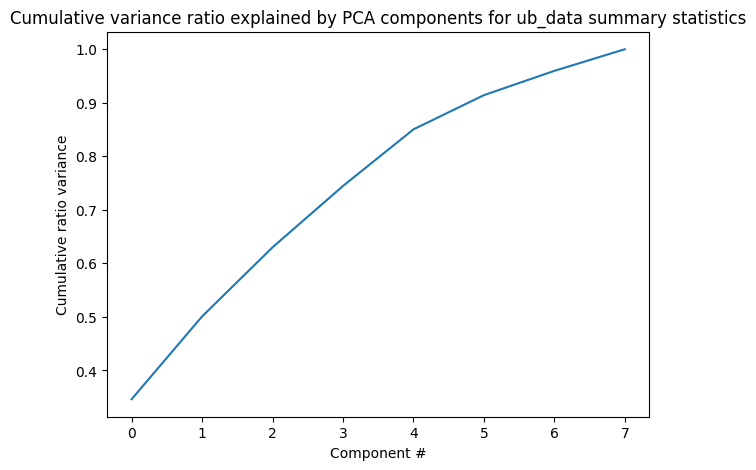

In [81]:
# Fit the PCA transformation using the scaled data.
# Plot the cumulative variance ratio with number of components.
ub_data_pca = PCA().fit(ub_data_full_scaled)
_ = plt.subplots(figsize=(7, 5))
_ = plt.plot(ub_data_pca.explained_variance_ratio_.cumsum())
_ = plt.xlabel('Component #')
_ = plt.ylabel('Cumulative ratio variance')
_ = plt.title('Cumulative variance ratio explained by PCA components for ub_data summary statistics')
plt.show()

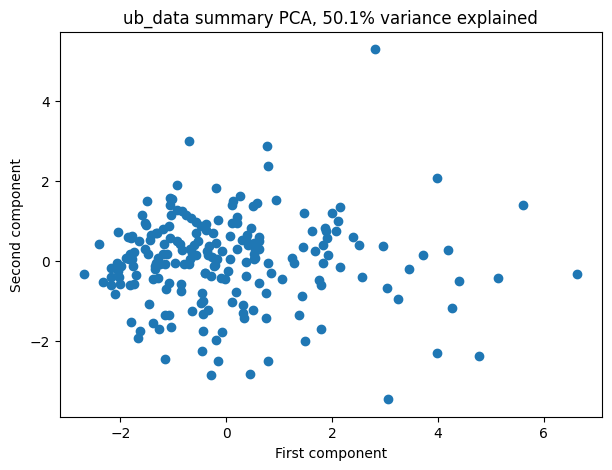

In [82]:
# Apply the transformation function to the data to obtain the derived features.
ub_data_pca_x = ub_data_pca.transform(ub_data_full_scaled)
x = ub_data_pca_x[:, 0]
y = ub_data_pca_x[:, 1]
pc_var = 100 * ub_data_pca.explained_variance_ratio_.cumsum()[1]
_ = plt.subplots(figsize=(7,5))
_ = plt.scatter(x=x, y=y)
_ = plt.xlabel('First component')
_ = plt.ylabel('Second component')
_ = plt.title(f'ub_data summary PCA, {pc_var:.1f}% variance explained')
plt.show()

In [73]:
#Create a dataframe containing the values of the first two PCA components
pca_df = pd.DataFrame({'PC1': ub_data_pca_x[:, 0], 'PC2': ub_data_pca_x[:, 1], 
                       'PC3': ub_data_pca_x[:, 2], 'PC4': ub_data_pca_x[:, 3],
                       'PC5': ub_data_pca_x[:, 4], 'PC6': ub_data_pca_x[:, 5],
                       "diagnosis":ub_data_full["diagnosis"]})
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,diagnosis
0,-1.274358,-1.711549,-0.277643,1.692605,1.314654,0.294741,1
19,-2.322954,-0.547804,0.081374,1.721870,1.021822,-0.873930,1
21,-1.759493,-0.131768,-0.494444,0.991400,0.446320,0.044478,1
27,-1.086834,-1.351407,0.731830,-0.212338,0.286859,-0.068166,1
28,-2.178224,-0.599214,1.554584,0.447171,0.094147,-0.949566,1


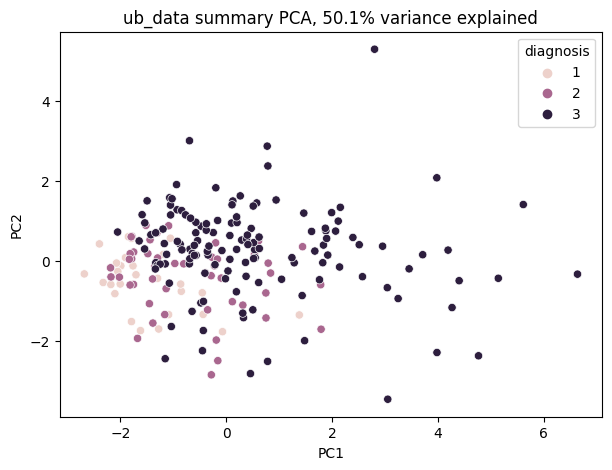

In [83]:
#Create a seaborn scatterplot by calling `sns.scatterplot`
#Specify the dataframe pca_df as the source of the data,
#specify 'PC1' for x and 'PC2' for y,
#specify 'diagnosis' for `hue`
pc_var = 100 * ub_data_pca.explained_variance_ratio_.cumsum()[1]
_ = plt.subplots(figsize=(7, 5))
_ = sns.scatterplot(x="PC1", y="PC2", hue="diagnosis", data=pca_df)
_ = plt.title(f'ub_data summary PCA, {pc_var:.1f}% variance explained')
plt.show()

The components_ attribute of the fitted PCA object tell us how important (and in what direction) each feature contributes to each score (or coordinate on the plot). The attribute is actually a numpy ndarray without helpful index and column names. We can construct a DataFrame of components_ with the feature names for context.

In [78]:
pd.DataFrame(ub_data_pca.components_, columns=ub_data_columns)

,age,sex,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,0.279594,0.118022,0.182506,0.205293,0.478946,0.488828,0.502400,0.334210
1,0.485446,-0.292401,0.450562,-0.686542,-0.015013,0.004682,-0.062482,-0.018591
2,-0.248985,0.665166,0.326558,-0.232464,-0.253460,0.101451,-0.208276,0.465798
3,-0.375321,-0.598209,-0.174368,-0.140838,-0.266381,0.273476,0.096205,0.544092
4,-0.444552,-0.253234,0.772748,0.301148,0.065499,-0.060561,0.034717,-0.203111
5,0.435713,-0.158851,0.135647,0.476766,-0.088270,-0.423382,-0.295511,0.514631
6,-0.301433,-0.044300,-0.104486,-0.267117,0.773626,-0.342589,-0.233943,0.233051
7,-0.070545,0.094592,0.013598,-0.152619,-0.156860,-0.612908,0.740131,0.120590


For the row associated with the first component, it looks like TFF1, REG1B, LYVE1, and REG1A might count for quite a lot, in a positive sense. For the row associated with the second component, age, plasma_CA19_9, and creatinine might play a role.

In [3]:
# Call the .corr() method on the dataset 
ub_data.corr()

/var/folders/4s/dkhgvddx5kb346fv_thq5bqh0000gn/T/ipykernel_19101/847458908.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ub_data.corr()


,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
age,1.000000,0.024023,0.308251,-0.005039,0.143203,-0.069393,0.329805,0.204317,0.207868,0.060082
sex,0.024023,1.000000,0.169081,0.089692,0.073408,0.180059,0.177008,0.157579,0.114623,0.116882
diagnosis,0.308251,0.169081,1.000000,NaN,0.263950,0.074888,0.540384,0.383516,0.392613,0.260110
stage,-0.005039,0.089692,NaN,1.000000,0.108238,0.188039,0.223320,0.076725,0.105798,0.150708
plasma_CA19_9,0.143203,0.073408,0.263950,0.108238,1.000000,-0.029418,0.257115,0.175814,0.150694,0.123293
creatinine,-0.069393,0.180059,0.074888,0.188039,-0.029418,1.000000,0.338533,0.261906,0.397795,0.060248
LYVE1,0.329805,0.177008,0.540384,0.223320,0.257115,0.338533,1.000000,0.543075,0.577363,0.277696
REG1B,0.204317,0.157579,0.383516,0.076725,0.175814,0.261906,0.543075,1.000000,0.690228,0.555385
TFF1,0.207868,0.114623,0.392613,0.105798,0.150694,0.397795,0.577363,0.690228,1.000000,0.418015
REG1A,0.060082,0.116882,0.260110,0.150708,0.123293,0.060248,0.277696,0.555385,0.418015,1.000000


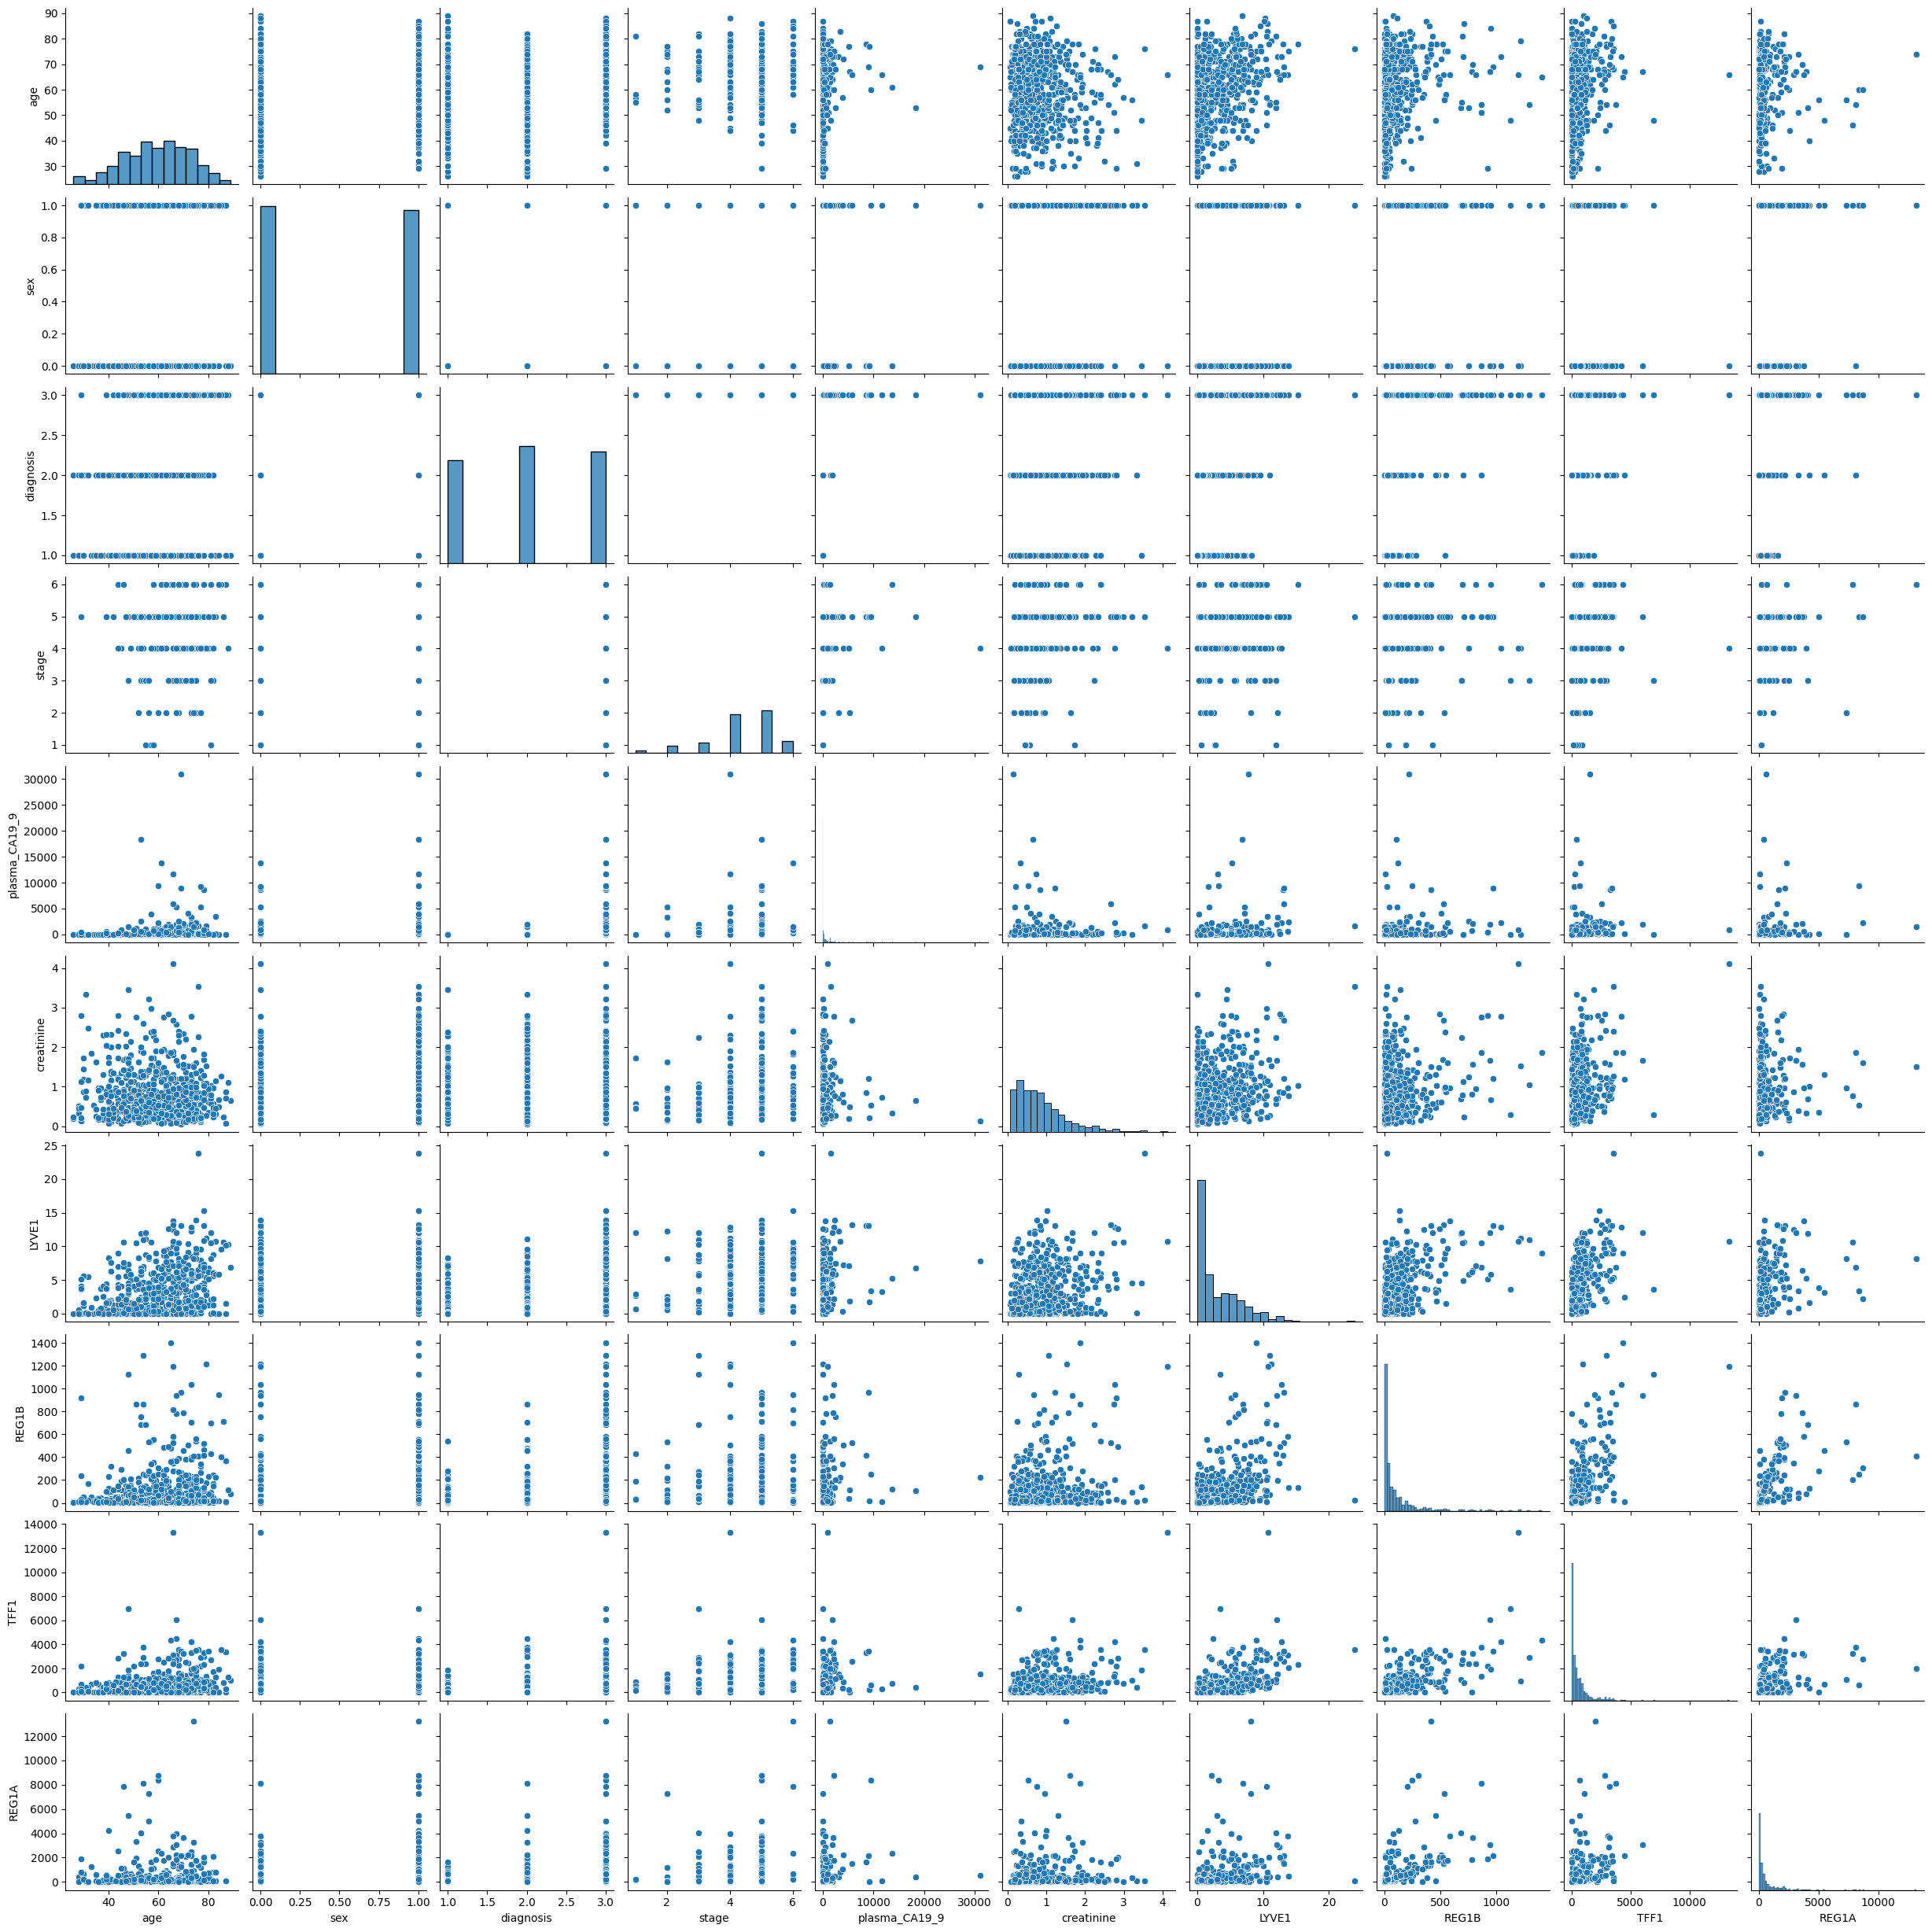

In [4]:
# Make a pairplot of the dataset
_ = sns.pairplot(ub_data)
plt.show()

/var/folders/4s/dkhgvddx5kb346fv_thq5bqh0000gn/T/ipykernel_19101/3463384.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _ = sns.heatmap(ub_data.corr())


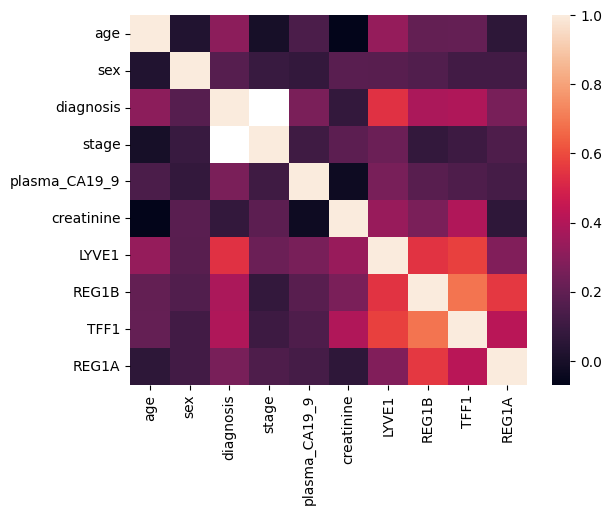

In [5]:
# Make a heatmap of the data 
_ = sns.heatmap(ub_data.corr())
plt.show()

There is a relatively strong correlation between the diagnosis and LYVE1 respectively, followed by TFF1, REG1B and REG1A.

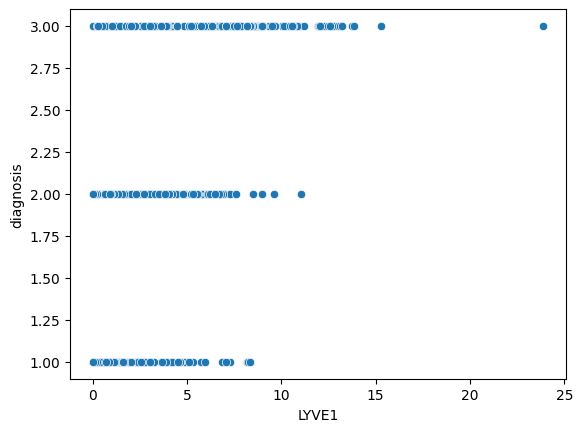

In [6]:
# Plot LYVE1 against diagnosis
_ = sns.scatterplot(x="LYVE1", y="diagnosis", data=ub_data)
plt.show()

Let's see if we can predict diagnosis based on LYVE1 using random forest regression. Since our response variable is categorical, e.g. diagnosis, a supervised classification model should be used.

In [7]:
# Subsetting our data into our dependent and independent variables.
ub_data_dep = ub_data[["diagnosis"]]
ub_data_indep = ub_data[["LYVE1"]]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ub_data_indep, ub_data_dep, random_state=0)

In [8]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(442, 1) (148, 1) (442, 1) (148, 1)


In [9]:
# Fit the model with the training data
# Implement the sklearn library to apply a random forest regression.

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0, n_estimators=200)
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)


/var/folders/4s/dkhgvddx5kb346fv_thq5bqh0000gn/T/ipykernel_19101/584038976.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


0.8316931223461612

At this moment, our model explains about 83% of the variation which is a bit higher than I expected...

In [10]:
# Review the model performances
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.7466865647075944


The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 0.75 signifies that we are, on average, about 0.75 of a unit of diagnosis away from the correct answer. However, since the diagnosis result is either 1, 2, or 3, we could potentially missclassify patients with a RMSE larger than 0.5. Let's see if we can improve the model performances by including multiple features.

In [11]:
# Subsetting our data into our dependent and independent variables.
# In addition to LYVE1, TFF1 and REG1B are also included.
ub_data_dep = ub_data[["diagnosis"]]
ub_data_indep = ub_data[["LYVE1", "TFF1", "REG1B"]]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(ub_data_indep, ub_data_dep, random_state=0)

In [12]:
# Fit the model with the training data
# Since our response variable is categorical, e.g. diagnosis, a supervised classification model should be used.
regressor = RandomForestRegressor(random_state=0, n_estimators=200)
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

/var/folders/4s/dkhgvddx5kb346fv_thq5bqh0000gn/T/ipykernel_19101/3997253421.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


0.9048767010137415

The R-Squared score shows a moderate improvement - our first model predicted only around 83% of the variation, and now we are predicting 90%.

In [13]:
# Review the model performances
y_pred = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.6416870974868367

RSME, a measure of the accuracy of a regression model, also shows a minor improvement, from 0.75 down to 0.64.

One of the hyptotheses in this study is that REG1A can be replaced with REG1B to improve the the model performances. Thus we will further examine the model performances of these two different models.

In [14]:
# Panel #1: LYVE1 + TFF1 + REG1A
# Subsetting our data into our dependent and independent variables.
# In order to compare REG1A with REG1B, we will use ub_data_full_REG1A that does not have any missing REG1A.
ub_data_dep = ub_data_full_REG1A[["diagnosis"]]
ub_data_indep = ub_data_full_REG1A[["LYVE1", "TFF1", "REG1A"]]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ub_data_indep, ub_data_dep, random_state=0)

In [15]:
# Fit the model with the training data
# Since our response variable is categorical, e.g. diagnosis, a supervised classification model should be used.
regressor = RandomForestRegressor(random_state=0, n_estimators=200)
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

/var/folders/4s/dkhgvddx5kb346fv_thq5bqh0000gn/T/ipykernel_19101/3997253421.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


0.8710258423332208

In [16]:
# Review the model performances
y_pred = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.6630691625205581

In [17]:
# Panel #2: LYVE1 + TFF1 + REG1B
# Subsetting our data into our dependent and independent variables.
# In order to compare REG1A with REG1B, we will use ub_data_full_REG1A that does not have any missing REG1A.
ub_data_dep = ub_data_full_REG1A[["diagnosis"]]
ub_data_indep = ub_data_full_REG1A[["LYVE1", "TFF1", "REG1B"]]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ub_data_indep, ub_data_dep, random_state=0)

In [18]:
# Fit the model with the training data
# Since our response variable is categorical, e.g. diagnosis, a supervised classification model should be used.
regressor = RandomForestRegressor(random_state=0, n_estimators=200)
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

/var/folders/4s/dkhgvddx5kb346fv_thq5bqh0000gn/T/ipykernel_19101/3997253421.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


0.8741380744459444

In [19]:
# Review the model performances
y_pred = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.7166713731849886

The R-Squared scores are almost the same between these two models. Replacing REG1A by REG1B in the panel did not further improve the performance of model to detect pancreatic cancer. Keep in mind that this result was obtained by using random_state = 0, we will need to do some model hyperparameter tuning to improve our model pedictions.